<a href="https://www.kaggle.com/code/sarthak02gupta/face-mask-detector?scriptVersionId=99279096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#installing opencv to read the images
!pip install opencv-python

#  Importing Necessary Libraries

In [2]:
#numpy for multidimensional arrays and matrices
import numpy as np 
#pandas for analysis , data cleaning
import pandas as pd
#pyplot for visualising data on a plot,pie chart and showing image
from matplotlib import pyplot as plt
#seaborn for histplots for EDA
import seaborn as sns 
#os for making,editing and removing directory
import os
#tensorflow for open source library to import keras
import tensorflow as tf
print ('Tensorflow Version:',tf.__version__)
#keras to create artificial neural network (cnn model) 
from tensorflow import keras
print ('Keras Version:',keras.__version__)
#cv2( open cv ) in order to read images
import cv2
#glob to find all files/pathnames that match a specified way we have given.
import glob
#element tree to parase xml files
from xml.etree import ElementTree

Tensorflow Version: 2.6.4
Keras Version: 2.6.0


In [3]:
#file location of face-mask-detection/annotations into annotations
annotations='../input/face-mask-detection/annotations'
#file location of face-mask-detection/images into images
images='../input/face-mask-detection/images'

In [4]:
#listing all annoations into annootations_files
annotation_files= !ls '../input/face-mask-detection/annotations'
annotation_files[:5]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml']

In [5]:
#listing all images into image_files
image_files= !ls '../input/face-mask-detection/images'
image_files[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [6]:
#total number of files and images in the dataset which must be equivalent to each other
len(annotation_files),len(image_files)

(853, 853)

# **DATA EXTRACTION**
Extracting necessary information like xmin,ymin,height,labels,weight of all the images

In [7]:
#to extract necessary info present in the xml document in a dictionary format
info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}
#finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    #parsing all xml files with element tree
    tree=ElementTree.parse(i)
    #getting all the neceesary attribute info into the dictionary
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
    
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    #file name present as ../input/face-mask-detection/annotations/maksssksksss.xml 
                    #so spliting name by '/' then using last portion thats-  makssksksss.xml -{.xml} 
                    info['file']+=[i.split('/')[-1][0:-4]]

                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]
            
        
    

In [8]:
#for aligning dictionary in form of 2D structure in tables and columns which is mutuable
annotations_info_df = pd.DataFrame(info)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,28,55,46,71,with_mask,maksssksksss737,400,226
1,98,62,111,78,with_mask,maksssksksss737,400,226
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226
3,293,59,313,80,with_mask,maksssksksss737,400,226
4,352,51,372,72,with_mask,maksssksksss737,400,226
5,228,53,241,73,with_mask,maksssksksss737,400,226
6,34,153,62,176,with_mask,maksssksksss410,400,267
7,88,138,111,163,with_mask,maksssksksss410,400,267
8,139,207,168,234,with_mask,maksssksksss410,400,267
9,116,135,135,154,with_mask,maksssksksss410,400,267


In [9]:
#adding annotations and image file names into annotations dataframe
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.png'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png


Using Image737 as we can see it has multiple labels like with_mask and mask_weared_incorrect hence we will use it to see if image has corresponding images labels are correct

In [10]:
#used to render the image in  a 12:8 format
def render(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()
# since image read by opencv is in bgr format we need to convert it into rgb format
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [11]:
#since 737 is a iamge at first location
annotations_info_df['image_file'].iloc[0]

'maksssksksss737.png'

In [12]:
#forming the file path of image 
image_path= '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[0]
image_path

'../input/face-mask-detection/images/maksssksksss737.png'

In [13]:
#read image through opencv which converts image to a array of 3d martrices
image737=cv2.imread(image_path)
image737

array([[[150, 210,  96],
        [147, 205,  94],
        [148, 203,  94],
        ...,
        [ 95,  97,  97],
        [ 93,  95,  96],
        [ 84,  86,  86]],

       [[148, 207,  95],
        [148, 206,  95],
        [150, 207,  95],
        ...,
        [ 96,  98,  98],
        [ 94,  96,  97],
        [ 84,  86,  87]],

       [[147, 206,  94],
        [147, 205,  94],
        [150, 208,  96],
        ...,
        [ 96,  96,  97],
        [ 93,  93,  94],
        [ 83,  83,  84]],

       ...,

       [[ 99, 101,  87],
        [ 58,  58,  50],
        [109, 107, 102],
        ...,
        [ 61,  72,  76],
        [ 88,  99, 101],
        [ 86,  95,  95]],

       [[104, 103,  92],
        [ 56,  53,  45],
        [102,  97,  91],
        ...,
        [ 80,  83,  89],
        [113, 114, 119],
        [135, 135, 138]],

       [[113, 111, 100],
        [ 62,  59,  49],
        [ 95,  90,  83],
        ...,
        [ 76,  91, 100],
        [ 99, 112, 119],
        [103, 114, 119]]

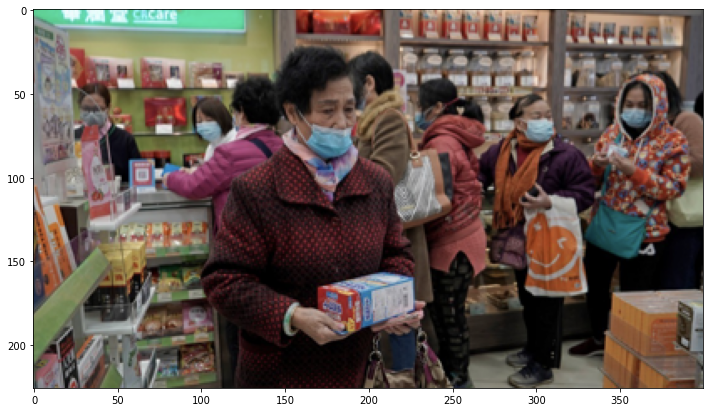

In [14]:
#rendering the image we choose in RGB format
render(convert_RGB(image737))

In [15]:
#finding corresponding annotations to the image
annotation737='../input/face-mask-detection/annotations/' + annotations_info_df['annotation_file'].iloc[0]
annotation737

'../input/face-mask-detection/annotations/maksssksksss737.xml'

In [16]:
#returns a tuple of the number of rows, columns, and channels
image737.shape
#here three channels represent RGB

(226, 400, 3)

#  Cropping Image for individual faces
We need image to be cropped as the image contains multiple faces and we need single image of person.
Moreover we need to crop out images to filter out the unnneded parts 

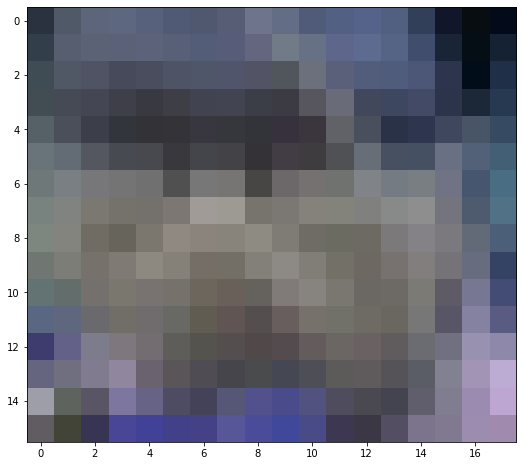

In [17]:
#Extracting information of first face from the data
x=annotations_info_df['xmin'].iloc[0]
y=annotations_info_df['ymin'].iloc[0]
width=annotations_info_df['xmax'].iloc[0]
height=annotations_info_df['ymax'].iloc[0]
#take the required slice of data from the information of first face extracted 
crop737=image737[y:height, x:width]
#rendering the image
render(crop737)

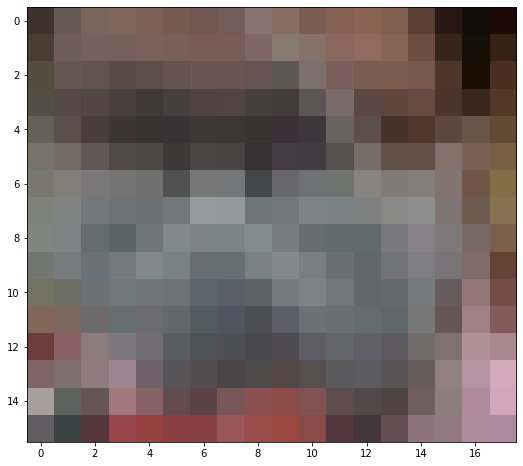

In [18]:
#Image is in pixelated form that is stretched out
#rendering image in RGB format
render(convert_RGB(crop737))


In [19]:
#After the crop ,total images should be equal to length of annotations
# which defines the number of faces present in the data

len(annotations_info_df)

4072

In [20]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
5,228,53,241,73,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
6,34,153,62,176,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
7,88,138,111,163,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
8,139,207,168,234,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
9,116,135,135,154,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png


# A Directory for cropped output of images
The images which have been cropped are needed to be added into the a new directory which will be later used into the keras imagedatagenerator (preprocessing of the image)   

In [21]:
!ls '../input/face-mask-detection'

annotations  images


In [22]:
#making a new directory named cropped
directory= 'cropped'
parent_directory= '/kaggle/working'
os.mkdir(os.path.join(parent_directory,directory))

In [23]:
#checking if directory added 
!ls './'

__notebook_source__.ipynb  cropped


In [24]:
#Adding Cropped image into annotation (just the file name)
annotations_info_df['cropped']=annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138


In [25]:
#traversing through all the annonations present
for i in range(len(annotations_info_df)):
    #selecting the filepath of a single image
    image_filepath='../input/face-mask-detection/images/'+annotations_info_df['image_file'].iloc[i]
    #reading the image
    image=cv2.imread(image_filepath)
    #adding the part and .png at the end of every file
    #example- maksssksksss212 will be given a number according to index and .png will be added
    #for it to become maksssksksss212-4071.png   
    annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.png'
    cropped_image_filename= annotations_info_df['cropped'].iloc[i]
    #getting the dimension needed to get a cropped images
    xmin= annotations_info_df['xmin'].iloc[i]
    ymin= annotations_info_df['ymin'].iloc[i]
    xmax= annotations_info_df['xmax'].iloc[i]
    ymax= annotations_info_df['ymax'].iloc[i]
    #cropping the image to get a single face and it  to croppedimage 
    croppedimage= image[ymin:ymax, xmin:xmax]
    #saving the cropped image to the designated directory
    cv2.imwrite(os.path.join('./cropped',cropped_image_filename),croppedimage)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-0.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-1.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-2.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-3.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13-4067.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4068.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4070.png


Just a small check if image have been loaded onto the directory or not

In [27]:
#listing all images into cropped
cropped=!ls './cropped'
cropped[:10]

['maksssksksss0-978.png',
 'maksssksksss0-979.png',
 'maksssksksss0-980.png',
 'maksssksksss1-3455.png',
 'maksssksksss1-3456.png',
 'maksssksksss1-3457.png',
 'maksssksksss1-3458.png',
 'maksssksksss1-3459.png',
 'maksssksksss1-3460.png',
 'maksssksksss1-3461.png']

In [28]:
#check to see if total cropped images are 4072 as stated earlier
print('Total croped images are: ',format(len(cropped)))

Total croped images are:  4072


In [29]:
#getting the file name
annotations_info_df['cropped'].iloc[0]

'maksssksksss737-0.png'

In [30]:
#getting location of the file
cropped737_0path= './cropped/'+annotations_info_df['cropped'].iloc[0]
cropped737_0path

'./cropped/maksssksksss737-0.png'

In [31]:
#reading the image using cv2 
cropped737_0= cv2.imread(cropped737_0path)
cropped737_0

array([[[ 43,  50,  63],
        [ 80,  89, 104],
        [ 93, 101, 122],
        [ 94, 103, 128],
        [ 88,  97, 124],
        [ 81,  90, 116],
        [ 80,  88, 112],
        [ 86,  93, 116],
        [110, 116, 140],
        [100, 109, 134],
        [ 79,  91, 121],
        [ 82,  96, 132],
        [ 85,  99, 138],
        [ 81,  96, 129],
        [ 50,  63,  89],
        [ 17,  23,  41],
        [  8,  13,  18],
        [  3,  10,  26]],

       [[ 50,  62,  74],
        [ 86,  94, 111],
        [ 92,  98, 117],
        [ 91,  98, 119],
        [ 91,  98, 122],
        [ 88,  96, 120],
        [ 84,  93, 119],
        [ 87,  93, 120],
        [ 99, 102, 126],
        [113, 122, 135],
        [103, 113, 133],
        [ 94, 103, 139],
        [ 94, 107, 145],
        [ 85, 100, 133],
        [ 64,  77, 108],
        [ 26,  36,  55],
        [  5,  14,  21],
        [ 21,  34,  52]],

       [[ 63,  76,  84],
        [ 80,  88, 101],
        [ 79,  83,  99],
        [ 70,  74,  9

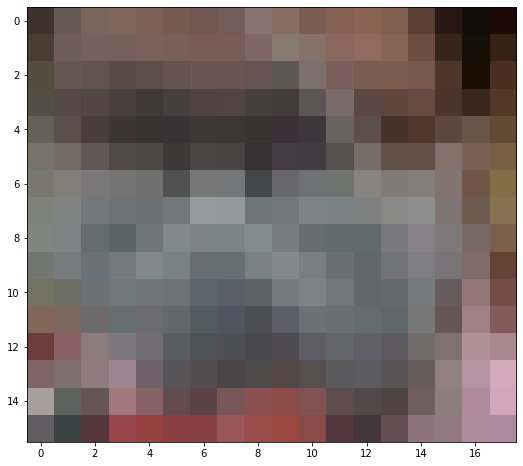

In [32]:
#rendering the image in rgb format
render(convert_RGB(cropped737_0))

In [33]:
#getting height, width and channels of the image
cropped737_0.shape


(16, 18, 3)

# Train Test Split
Spliting dataset into train_df and test_df to train the model and to test the model accurately 

In [34]:
#spliting the data into 80-20% for train and test respectively
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(annotations_info_df,test_size=0.20)

In [35]:
#getting the shape of the dataframe
train_df.shape,test_df.shape

((3257, 11), (815, 11))

In [36]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
1554,32,61,47,76,without_mask,maksssksksss318,400,226,maksssksksss318.xml,maksssksksss318.png,maksssksksss318-1554.png
1447,25,22,31,31,without_mask,maksssksksss773,400,274,maksssksksss773.xml,maksssksksss773.png,maksssksksss773-1447.png
639,38,248,111,354,with_mask,maksssksksss668,301,400,maksssksksss668.xml,maksssksksss668.png,maksssksksss668-639.png
1257,90,213,171,321,with_mask,maksssksksss712,301,400,maksssksksss712.xml,maksssksksss712.png,maksssksksss712-1257.png
3407,100,59,114,76,with_mask,maksssksksss661,400,261,maksssksksss661.xml,maksssksksss661.png,maksssksksss661-3407.png


In [37]:
#checking for the number of categories of the image label
classes= list(train_df['label'].unique())
classes

['without_mask', 'with_mask', 'mask_weared_incorrect']

Image Claasification on a Single Object

In [38]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
1554,32,61,47,76,without_mask,maksssksksss318,400,226,maksssksksss318.xml,maksssksksss318.png,maksssksksss318-1554.png
1447,25,22,31,31,without_mask,maksssksksss773,400,274,maksssksksss773.xml,maksssksksss773.png,maksssksksss773-1447.png
639,38,248,111,354,with_mask,maksssksksss668,301,400,maksssksksss668.xml,maksssksksss668.png,maksssksksss668-639.png
1257,90,213,171,321,with_mask,maksssksksss712,301,400,maksssksksss712.xml,maksssksksss712.png,maksssksksss712-1257.png
3407,100,59,114,76,with_mask,maksssksksss661,400,261,maksssksksss661.xml,maksssksksss661.png,maksssksksss661-3407.png
...,...,...,...,...,...,...,...,...,...,...,...
159,344,35,361,52,without_mask,maksssksksss209,400,210,maksssksksss209.xml,maksssksksss209.png,maksssksksss209-159.png
3259,159,89,177,114,with_mask,maksssksksss706,400,267,maksssksksss706.xml,maksssksksss706.png,maksssksksss706-3259.png
1785,104,45,120,63,with_mask,maksssksksss728,400,266,maksssksksss728.xml,maksssksksss728.png,maksssksksss728-1785.png
625,340,98,383,139,without_mask,maksssksksss699,400,279,maksssksksss699.xml,maksssksksss699.png,maksssksksss699-625.png


In [39]:
#Doing object classification on single random image to see if person 
#in the image is masked ,no masked and incorrectly worn
train_df[train_df['file']=='maksssksksss52']['label'].unique()

array(['with_mask', 'without_mask', 'mask_weared_incorrect'], dtype=object)

In [40]:
#reading the image
image52_path='../input/face-mask-detection/images/maksssksksss52.png'
image52= cv2.imread(image52_path)
image52

array([[[201, 186, 190],
        [178, 169, 171],
        [126, 120, 121],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[178, 164, 164],
        [168, 159, 157],
        [163, 157, 154],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[146, 135, 132],
        [145, 138, 134],
        [148, 144, 139],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       ...,

       [[ 29,  30,  33],
        [ 29,  30,  33],
        [ 29,  30,  33],
        ...,
        [ 42,  50,  58],
        [ 40,  48,  56],
        [ 42,  51,  59]],

       [[ 31,  32,  33],
        [ 31,  32,  33],
        [ 31,  33,  33],
        ...,
        [ 41,  49,  57],
        [ 41,  49,  57],
        [ 45,  53,  61]],

       [[ 34,  35,  36],
        [ 35,  37,  38],
        [ 37,  39,  40],
        ...,
        [ 42,  50,  58],
        [ 39,  47,  55],
        [ 44,  52,  60]]

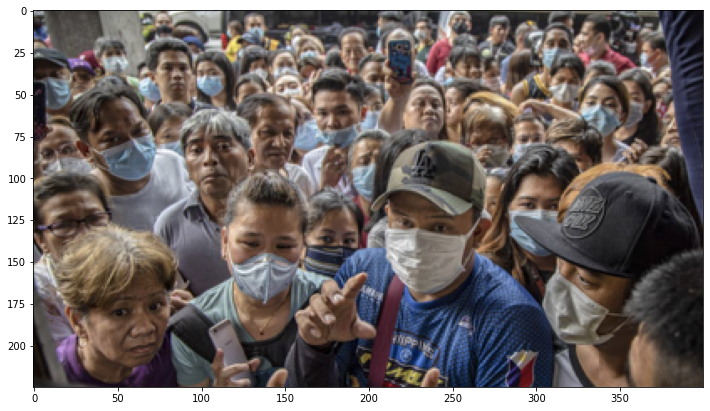

In [41]:
#rendering the image in RGB format
image52_rgb=convert_RGB(image52)
render(image52_rgb)

In [42]:
#finding annotations corresponding to the image 
image52_df=train_df[train_df['file']== 'maksssksksss52']
image52_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
3818,250,4,261,16,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3818.png
3820,246,51,256,72,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3820.png
3788,76,69,92,88,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3788.png
3825,284,111,316,150,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3825.png
3799,41,23,58,40,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3799.png
3795,168,57,196,85,mask_weared_incorrect,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3795.png
3786,2,77,35,99,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3786.png
3809,129,7,139,19,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3809.png
3802,73,5,84,16,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3802.png
3790,116,132,161,175,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3790.png


In [43]:
#adding the persons into withmask ,withoutmask, incorrectly worn lists 
withmaskl,withoutmaskl,incorrectl=[],[],[]
for i in range(len(image52_df)):
    bb= [image52_df['xmin'].iloc[i],
        image52_df['ymin'].iloc[i],
        image52_df['xmax'].iloc[i],
        image52_df['ymax'].iloc[i]]
    if image52_df['label'].iloc[i]== 'with_mask':
        withmaskl.append(bb)
    elif image52_df['label'].iloc[i]=='without_mask':
        withoutmaskl.append(bb)
    else:
        incorrectl.append(bb)
#creating a dictionary with the lists above
foundobjectdict= {
    'With Mask': withmaskl,
    'Without Mask': withoutmaskl,
    'Incorrectly Worn': incorrectl
}
foundobjectdict

{'With Mask': [[250, 4, 261, 16],
  [76, 69, 92, 88],
  [284, 111, 316, 150],
  [41, 23, 58, 40],
  [2, 77, 35, 99],
  [129, 7, 139, 19],
  [73, 5, 84, 16],
  [116, 132, 161, 175],
  [161, 130, 195, 163],
  [1, 34, 24, 61],
  [94, 22, 103, 33],
  [115, 10, 120, 19],
  [127, 31, 142, 44],
  [260, 74, 285, 97],
  [209, 119, 262, 170],
  [194, 54, 211, 73],
  [270, 33, 281, 49],
  [157, 61, 173, 84],
  [352, 48, 366, 71],
  [159, 21, 171, 32],
  [191, 84, 208, 117],
  [268, 110, 279, 127],
  [63, 37, 77, 56],
  [328, 51, 352, 77],
  [304, 16, 322, 36],
  [39, 65, 75, 103],
  [362, 23, 370, 36],
  [154, 13, 163, 24],
  [143, 29, 160, 42]],
 'Without Mask': [[246, 51, 256, 72],
  [378, 61, 388, 84],
  [185, 20, 200, 37],
  [6, 117, 47, 149],
  [131, 67, 157, 97],
  [74, 31, 96, 53],
  [37, 166, 84, 214],
  [276, 9, 284, 19]],
 'Incorrectly Worn': [[168, 57, 196, 85],
  [326, 11, 338, 30],
  [23, 37, 37, 54]]}

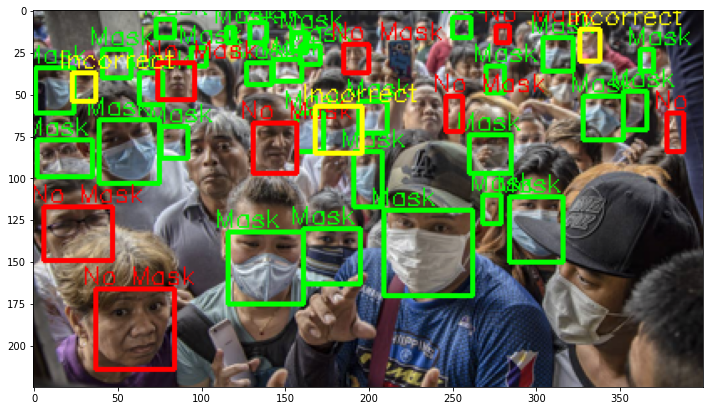

In [44]:
#traversing through the dictionary 
for key, value in foundobjectdict.items():
    #assigning color according to label the person has
    for i in range(len(value)):
        #by default , color and text for masked person to be: 'green' and 'mask' 
        color= (0,255,0)
        text='Mask'
        if key=='Without Mask':
            #color and text for unmasked person to be: 'red' and 'no mask'
            color= (255,0,0)
            text='No Mask'
        elif key== 'Incorrectly Worn':
            #color text for incorrectly worn masked person to be: 'yellow' and 'incorrect'
            color= (255,255,0)
            text='Incorrect'
        #finfing corners of starting line and ending lines of the face of person
        start=(value[i][0],value[i][1])
        end=(value[i][2],value[i][3])
        #creating a rectangle across the face according to the color
        cv2.rectangle(image52_rgb,start,end,color=color,thickness=2)
        #putting text on image with the rectangle
        cv2.putText(image52_rgb, org= (value[i][0]-8,value[i][1]-3),text=text,
                   fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=color)
#rendering image with the updates on the image
render(image52_rgb)

# Exploratory Data Analysis(EDA)
Finding trends or characteristics by analyzing and investigating the data

In [45]:
#counted occurence of the label of images 
train_df['label'].value_counts()

with_mask                2597
without_mask              565
mask_weared_incorrect      95
Name: label, dtype: int64

In [46]:
#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(train_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

,label,count
0,with_mask,2597
1,without_mask,565
2,mask_weared_incorrect,95


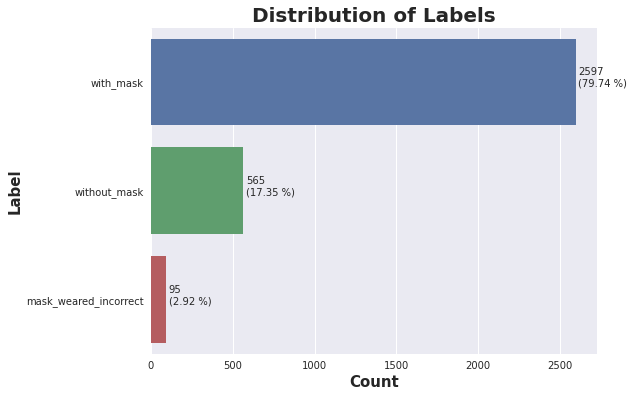

In [47]:
#plotting the barplot of the label occurred
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    #to calculate percentage of each label in the data specified
    percentage = round(width * 100 / sum(sortedlabel['count']), 2)
    #putting text about the numer and the percentage corresponding to each label
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [48]:
#getting the width,height and channels of first image
croppedpath = './cropped/' + train_df['cropped'].iloc[0]
croppedimage = cv2.imread(croppedpath)
croppedimage.shape

(15, 15, 3)

In [49]:
#adding image width and image height of every image to the list 
imagewidth=[]
imageheight=[]
#traversing through the all image
for i in range(len(train_df)):
    croppedimagepath= './cropped/'+train_df['cropped'].iloc[i] 
    croppedimage=cv2.imread(croppedimagepath)
    #adding image height and width of the image to list
    imagewidth.append(croppedimage.shape[0])
    imageheight.append(croppedimage.shape[1])
    
    

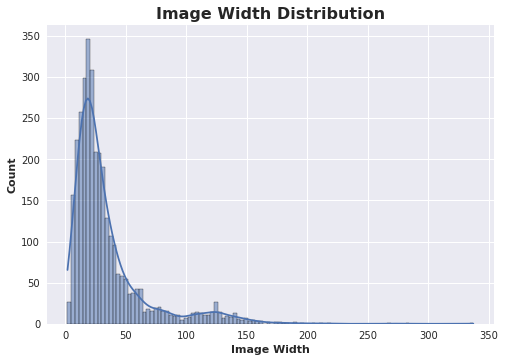

In [50]:
#plotting histogram of imagewidth
sns.histplot(imagewidth,kde=True)
plt.title('Image Width Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Width',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

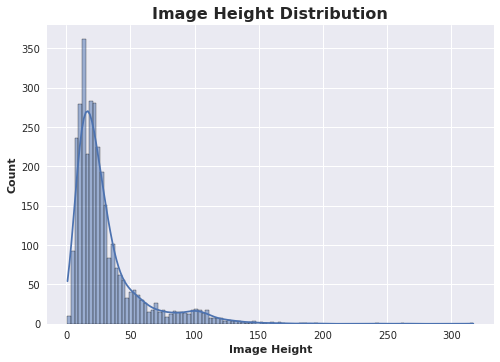

In [51]:
#plotting histogram of imageheight
sns.histplot(imageheight,kde=True)
plt.title('Image Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Height',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

# Preprocessing
Processing data in such a way that is acceptable to the model and bring in randomness to ensure better feasibility of the model

In [52]:
#taking median of imagewidth and imageheight as targetimage size 
targetimage=(int(np.median(imagewidth)),int(np.median(imageheight)))
targetimage

(24, 22)

In [53]:
# using imagedatagenerator expand the training dataset in order 
# to improve the performance and ability of the model to generalize.
from keras_preprocessing.image import ImageDataGenerator
#rescale=1./255 will convert the pixels in range [0,255] to range [0,1], thus normalising the data and
#contributing to total losses , moreover we are also spliting image generator for 25 percent validation set.
train_image_generator= ImageDataGenerator(rescale= 1. / 255. , validation_split=0.25)
#train image generator to generate batches of tensor train image dataset with augmentation.
train_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df, 
    directory='./cropped',
    x_col='cropped',
    y_col='label',
    #using 75%  dataset as training set
    subset='training',
    #size of batch of data being 32
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode= 'categorical',
    target_size = targetimage
    )
#valid image generator to generate batches of tensor valid image dataset with augmentation.
valid_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 2443 validated image filenames belonging to 3 classes.
Found 814 validated image filenames belonging to 3 classes.


In [54]:
#also creating image generator for test dataset for randomness
test_image_generator= ImageDataGenerator(rescale = 1./255.)
#test image generator with augmented data to test acccuracy of the model
test_generator= train_image_generator.flow_from_dataframe(
    #will use test_df as dataframe
    dataframe=test_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 815 validated image filenames belonging to 3 classes.


# MODELLING
Creating a CNN model to predict if the person have worn mask or not or have worn it incorrectly

In [55]:
#taking input shape as median of imagewidth,median of imageheight, 3 as channels because colours are RGB
inputshape= [int(np.median(imagewidth)),int(np.median(imageheight)),3]
inputshape

[24, 22, 3]

In [56]:
#using a sequential model as there exist only one input that is the image and
#only one output that is whether it is with mask, no mask or incorrectly worn mask
model1= keras.models.Sequential([
    #Conv2D creates a convolution kernel that is combined with the layer input to produce a tensor of outputs
    #here filter provides a measure for a region of the input to resemble a feature
    #kernel size specifies the height and width of the 2D convolution window
    #activation has activation function relu(Rectified Linear Unit) which keeps all negative values to be zero and all other values to be constant
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=inputshape),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    #MaxPool2D downsamples the input along its height and width by taking the maximum value over an input matrix for each channel of the input
    # pool_size signify window size (matrix window ) over which to take the maximum
    #padding valid ensure that no padding is necessary for model.
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    #flatten function will flattens the multi-dimensional input tensors into a single dimension
    keras.layers.Flatten(),
    #Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
    #unit size decides  the dimensionality of the output space which is 3 in this case
    #activation function softmax has been used as class is of size 3 and softmax predicts a multinomial probability distribution
    keras.layers.Dense(units=len(classes),activation='softmax')
    
    
])

2022-06-25 09:10:12.613586: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [57]:
#compiling the model by configuring the model with losses and metrics
#loss function used to find deviation in learning process;
#here categoricalcrossentrophy used as loss function because it is for multi-class classification model where there exists two or more output labels.
#optimiser optimizes the input weights by comparing the prediction and the loss function,Adam optimization is a stochastic gradient descent method as its faster
#Metrics is used to evaluate the performance of the model here mterics.recall recalls the prediction on basis of labels
model1.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',keras.metrics.Recall()])
#fit trains the model for a fixed number of epochs
#here input is train_generator, epochs represents one complete pass of the training dataset through the algorithm
#steps_per_epoch is total number of batches of samples before declaring one epoch finished so the model goes through all the test generator data once in our case
#validation data is data on which to evaluate the loss and any model metrics at the end of each epoch, model is not trained on it
#validation steps is total number of batches of samples to draw before stopping when performing validation at the end of every epoch
history1=model1.fit(train_generator,epochs=10,steps_per_epoch=len(train_generator),
                   validation_data=valid_generator,validation_steps=len(valid_generator))

2022-06-25 09:10:12.834424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
77/77 [==============================] - 4s 34ms/step - loss: 0.5886 - accuracy: 0.7740 - recall: 0.6504 - val_loss: 0.3217 - val_accuracy: 0.8894 - val_recall: 0.8821
Epoch 2/10
77/77 [==============================] - 2s 20ms/step - loss: 0.2966 - accuracy: 0.9108 - recall: 0.9071 - val_loss: 0.2543 - val_accuracy: 0.9275 - val_recall: 0.9165
Epoch 3/10
77/77 [==============================] - 2s 21ms/step - loss: 0.2655 - accuracy: 0.9251 - recall: 0.9177 - val_loss: 0.2409 - val_accuracy: 0.9287 - val_recall: 0.9214
Epoch 4/10
77/77 [==============================] - 2s 21ms/step - loss: 0.2458 - accuracy: 0.9267 - recall: 0.9222 - val_loss: 0.2397 - val_accuracy: 0.9263 - val_recall: 0.9238
Epoch 5/10
77/77 [==============================] - 2s 21ms/step - loss: 0.2402 - accuracy: 0.9280 - recall: 0.9235 - val_loss: 0.2174 - val_accuracy: 0.9361 - val_recall: 0.9312
Epoch 6/10
77/77 [==============================] - 2s 21ms/step - loss: 0.2227 - accuracy: 0.9312 - reca

In [58]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result1=pd.DataFrame(history1.history)
result1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.588571,0.774048,0.650430,0.321652,0.889435,0.882064
1,0.296612,0.910765,0.907081,0.254270,0.927518,0.916462
2,0.265491,0.925092,0.917724,0.240916,0.928747,0.921376
3,0.245848,0.926729,0.922227,0.239677,0.926290,0.923833
4,0.240176,0.927957,0.923455,0.217390,0.936118,0.931204
5,0.222694,0.931232,0.929185,0.203595,0.937346,0.931204
6,0.213210,0.932460,0.929595,0.190473,0.934889,0.932432
7,0.212899,0.928776,0.924273,0.181599,0.936118,0.936118
8,0.192289,0.939419,0.934097,0.166025,0.952088,0.949631
9,0.174783,0.941056,0.937781,0.159044,0.947174,0.945946


<AxesSubplot:>

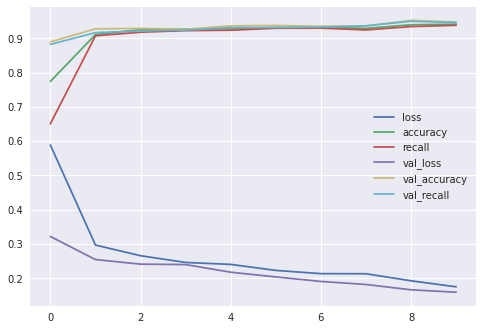

In [59]:
#plotting the result
result1.plot()


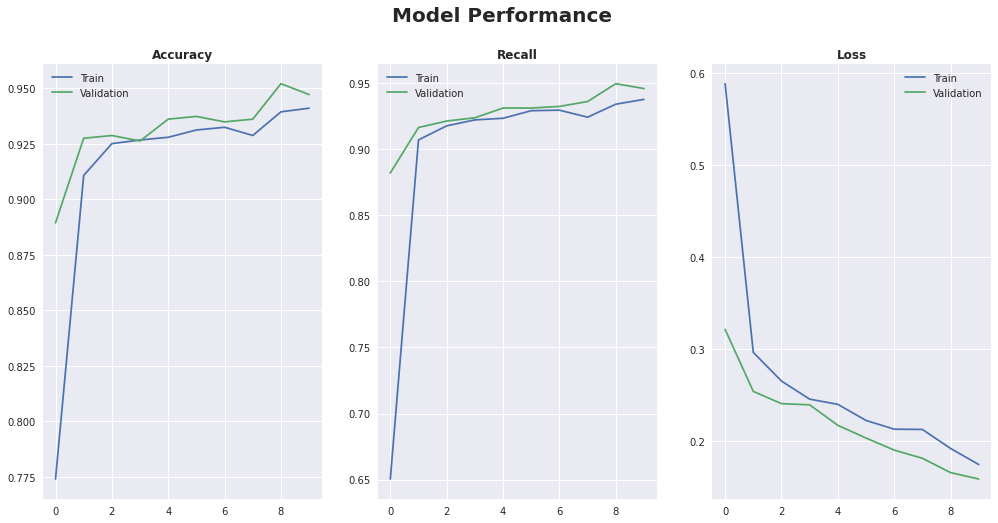

In [61]:
#plotting the lines of train and validate values returned
def plot_line(result,ax,col,title,train_col,valid_col):
    ax[col].plot(result[train_col])
    ax[col].plot(result[valid_col])
    
    ax[col].set_title(title,fontweight='bold')
    ax[col].legend(['Train','Validation'])
#plotting 3 graphs corresponding to accuracy, recall and loss
def plot_result(result,train_recol,valid_recol):
    fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(17,8))
    fig.suptitle('Model Performance', fontsize=20, fontweight='bold')
    
    plot_line(result,ax,0,'Accuracy','accuracy','val_accuracy')
    plot_line(result,ax,1,'Recall',train_recol,valid_recol)
    plot_line(result,ax,2,'Loss','loss','val_loss')
    plt.show()

#plotting the graphs for model1 result
plot_result(result1,'recall','val_recall')

# Early Stopping Callback
This is the way through which we stop training the model when accuracy stagnates after training for certain epoches

In [62]:
#creating model2 of sequentical cnn 
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = inputshape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [63]:
#compiling the losses of model2
model2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])
#EarlyStopping stop training when a monitored metric has stopped improving.
#val_loss is monitored where val_loss is losses occured during validation
# mode min signifies training will stop when the quantity monitored has stopped decreasing
#verbose 1 displays messages when the callback takes an action and patience represent number of epochs with no improvement after which training will be stopped
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
#fitting model for 100 epoches but with callback
history2 = model2.fit(train_generator,
                        epochs = 100,
                        steps_per_epoch = len(train_generator),
                        validation_data = valid_generator,
                        validation_steps = len(valid_generator),
                        callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 3s 26ms/step - loss: 0.7025 - accuracy: 0.7086 - recall_1: 0.5538 - val_loss: 0.5542 - val_accuracy: 0.7875 - val_recall_1: 0.7862
Epoch 2/100
77/77 [==============================] - 2s 24ms/step - loss: 0.4682 - accuracy: 0.8043 - recall_1: 0.7970 - val_loss: 0.3767 - val_accuracy: 0.8489 - val_recall_1: 0.7752
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 0.3211 - accuracy: 0.9095 - recall_1: 0.8813 - val_loss: 0.2620 - val_accuracy: 0.9251 - val_recall_1: 0.9226
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 0.2825 - accuracy: 0.9161 - recall_1: 0.9112 - val_loss: 0.2520 - val_accuracy: 0.9337 - val_recall_1: 0.9214
Epoch 5/100
77/77 [==============================] - 2s 20ms/step - loss: 0.2539 - accuracy: 0.9308 - recall_1: 0.9247 - val_loss: 0.2397 - val_accuracy: 0.9300 - val_recall_1: 0.9251
Epoch 6/100
77/77 [==============================] - 2s 20ms/step - loss: 0.2479

In [64]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result2 = pd.DataFrame(history2.history)
result2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.702473,0.708555,0.553827,0.554223,0.787469,0.786241
1,0.468184,0.804339,0.796971,0.376664,0.848894,0.775184
2,0.321123,0.909537,0.881293,0.261950,0.925061,0.922604
3,0.282534,0.916087,0.911175,0.252024,0.933661,0.921376
4,0.253913,0.930823,0.924683,0.239727,0.929975,0.925061
5,0.247875,0.926729,0.923045,0.252365,0.923833,0.916462
6,0.239269,0.927957,0.922636,0.220263,0.936118,0.932432
7,0.225551,0.931232,0.929185,0.209084,0.933661,0.933661
8,0.226164,0.933279,0.930413,0.226270,0.925061,0.921376
9,0.211156,0.935325,0.932460,0.247336,0.921376,0.916462


<AxesSubplot:>

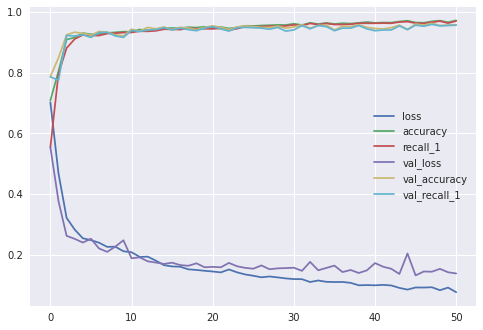

In [65]:
#plotting result
result2.plot()

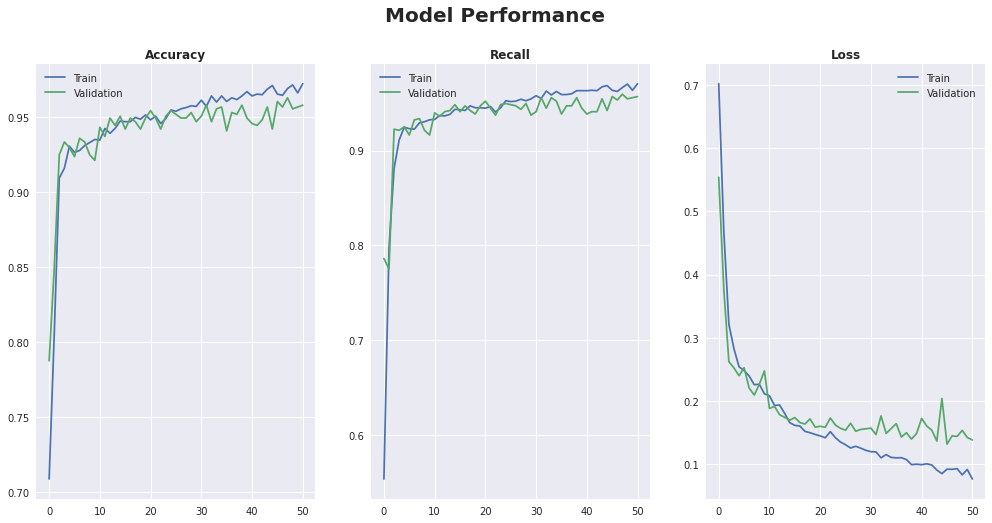

In [67]:
#plotting the graphs for model1 result
plot_result(result2, 'recall_1', 'val_recall_1')

# Accuracy Test
Finally using test dataset both the model to get accuracy 

In [68]:
model1.evaluate(test_generator)
model2.evaluate(test_generator)


26/26 [==============================] - 0s 12ms/step - loss: 0.2070 - accuracy: 0.9472 - recall_1: 0.9460


[0.20702940225601196, 0.9472392797470093, 0.9460122585296631]

Hence the Model1 is 93.25 percent accurate

Model2 is 94.72 percent accurate.